In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np

In [2]:
from tensorflow.keras import datasets,models,layers 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv("D:\\project\\sample_project\\csv files\\fashion-mnist_train.csv")
test_df = pd.read_csv("D:\\project\\sample_project\\csv files\\fashion-mnist_test.csv")

In [4]:
train_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data = np.array(train_df,dtype = "float32")
test_data = np.array(test_df,dtype = "float32")
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test = test_data[:,1:]/255
y_test = test_data[:,0]

In [6]:
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.2,random_state=123)

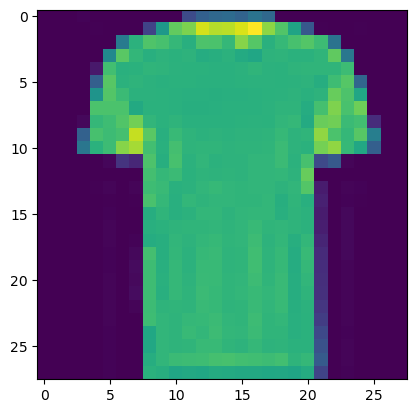

In [7]:
image = x_train[60,:].reshape((28,28))
plt.imshow(image)

In [8]:
!pip install keras

In [23]:
from keras.models import Sequential
from keras.layers import MaxPooling2D,Dense,Flatten,Dropout,Conv2D,Input

In [10]:
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [12]:
im_rows = 28
im_cols = 28

In [13]:
batch_size = 32
im_shape = (im_rows,im_cols,1)

In [15]:
x_train = x_train.reshape(x_train.shape[0],*im_shape)
x_valid = x_valid.reshape(x_valid.shape[0],*im_shape)
x_test = x_test.reshape(x_test.shape[0],*im_shape)

In [25]:
cnn_model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(filters=32, kernel_size=3, activation="relu"),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")
])

In [27]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

cnn_model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=10,
    verbose=1,
    validation_data=(x_valid, y_valid)
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.7767 - loss: 0.6345 - val_accuracy: 0.8793 - val_loss: 0.3334
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8852 - loss: 0.3213 - val_accuracy: 0.8917 - val_loss: 0.3017
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8993 - loss: 0.2823 - val_accuracy: 0.8965 - val_loss: 0.2869
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9047 - loss: 0.2607 - val_accuracy: 0.8998 - val_loss: 0.2766
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9123 - loss: 0.2391 - val_accuracy: 0.9055 - val_loss: 0.2649
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9200 - loss: 0.2209 - val_accuracy: 0.9056 - val_loss: 0.2640
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9255 - loss: 0.2013 - val_accuracy: 0.9070 - val_loss: 0.2619
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9300 -

In [28]:
score = cnn_model.evaluate(x_test,y_test,verbose = 0)
print(score[0])
print(score[1])

0.2508741319179535
0.9146000146865845
